# **Overview**
**In this dataset, we will be analyzing the flight fare prediction using Machine Learning dataset using essential exploratory data analysis techniques .The primary goal of this dataset is to facilitate the development and evaluation of machine learning models aimed at predicting flight ticket prices. By leveraging historical flight details, temporal aspects, routing information, and contextual factors, these models aim to forecast prices accurately.**

**Importing libraries,Reading and Understanding the Data**


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
df=pd.read_csv("/content/drive/MyDrive/Datasets/Data_Train.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
#Understand the data
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
#Checking the shape of the data
df.shape

(10683, 11)

**Data Cleaning**

In [ ]:
# Display the count of missing values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Display the count of missing values
df.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
# Convert the 'Date_of_Journey' column to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
# Extract the day and month components
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month



In [ ]:
# Drop the original 'Date_of_Journey' column
df =df.drop(['Date_of_Journey'], axis=1)

In [ ]:
# Extracting Hours
df['dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
# Extracting Minutes
df['dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
# Now we drop Dep_time as it is of no use
df.drop(['Dep_Time'],axis=1,inplace=True)


In [ ]:
# Extracting Hours
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
# Extracting Minutes
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
# Now we drop Dep_time as it is of no use
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
# Extract Hours and Minutes from Duration
df['Duration_hours'] = df['Duration'].str.extract(r'(\d+)h').astype(float).fillna(0)
df['Duration_minutes'] = df['Duration'].str.extract(r'(\d+)m').astype(float).fillna(0)
# Drop the original 'Duration' column
df = df.drop('Duration', axis=1)


In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4.0,45.0


**Exploratory Data Analysis(EDA)**

In [ ]:
# Replace values in the 'Destination' column
df['Destination'] = df['Destination'].replace({'Delhi': 'New Delhi'})
df['Source'] = df['Source'].replace({'Delhi': 'New Delhi'})
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2.0,30.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2.0,35.0
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3.0,0.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2.0,40.0


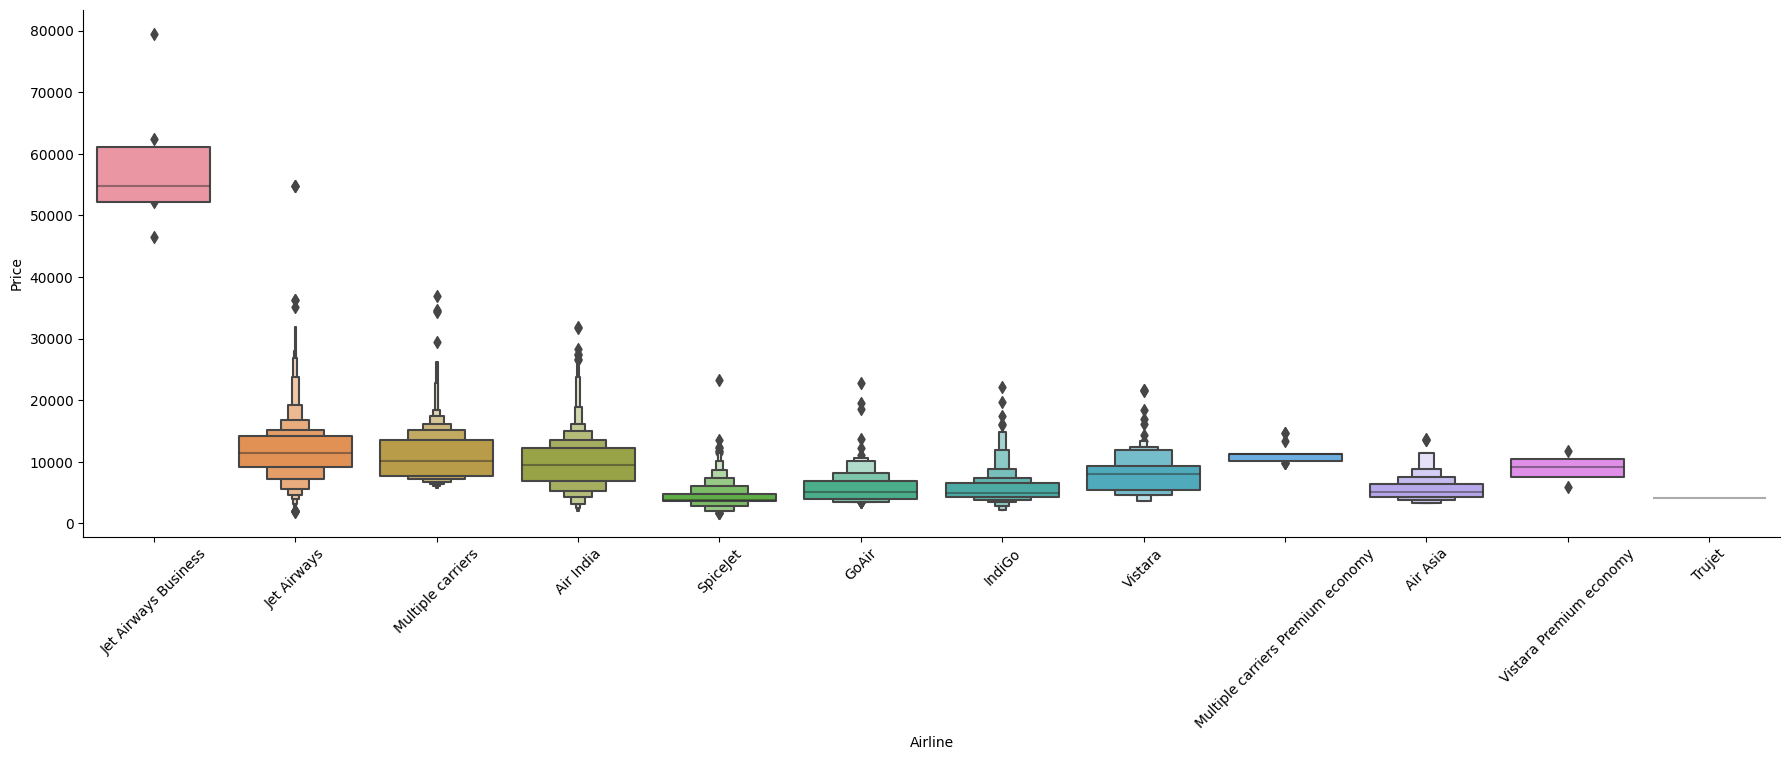

In [ ]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation = 45)
plt.show()

# Inference: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight
# and airline and we can conclude that Jet Airways Business  has the most outliers in terms of price.

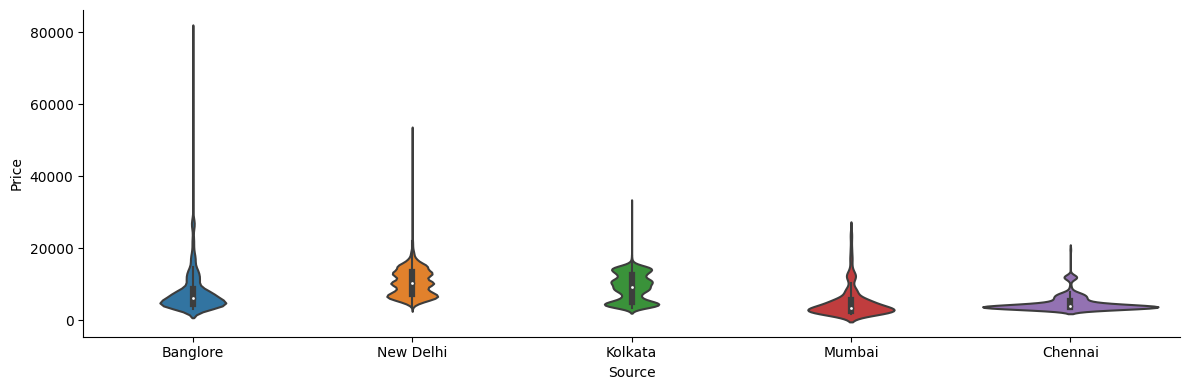

In [ ]:
# Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data =df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

# Inference: Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e.
# the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers
# while Chennai has the least.

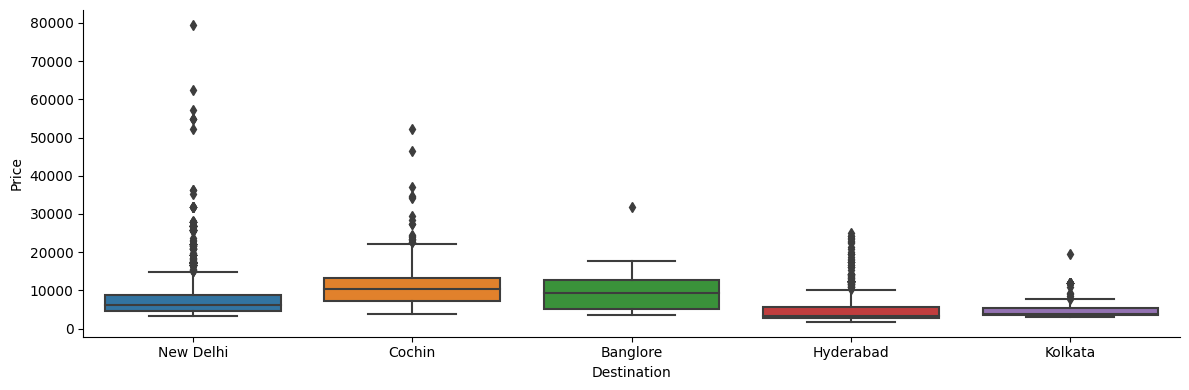

In [ ]:
# Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# Inference: Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which
# the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

In [ ]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2.0,30.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2.0,35.0
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3.0,0.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2.0,40.0


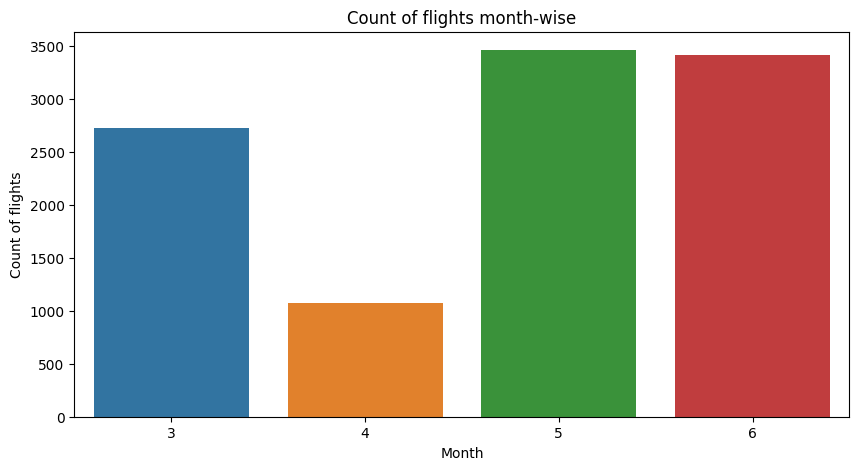

In [ ]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize=(10, 5))
plt.title('Count of flights month-wise')
sns.countplot(x='Journey_Month', data=df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.show()

# Inference: Here in the above graph we have plotted the count plot for journey a month vs several
# flights and got to see that May has the most number of flights.

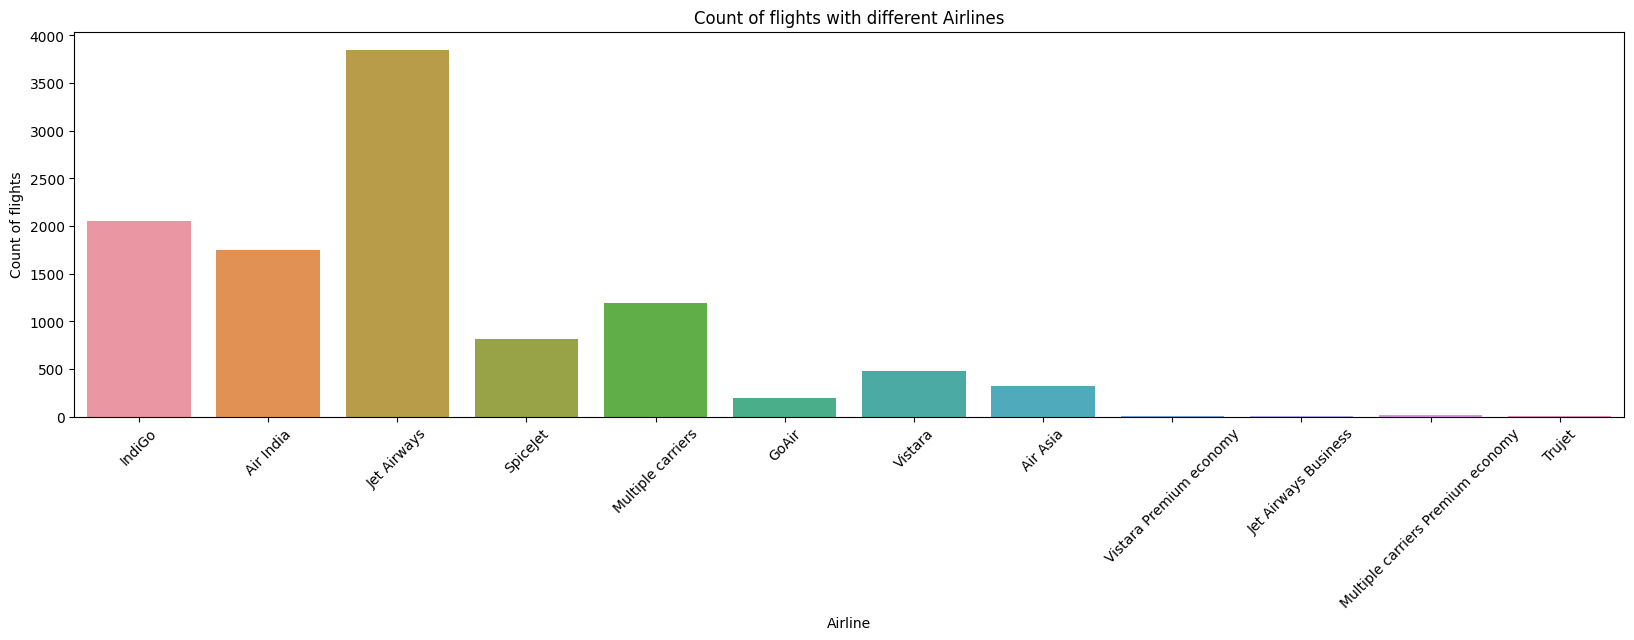

In [ ]:
# Plotting Bar chart for Types of Airline vs Number of Flights

plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
plt.show()

# Inference: Now from the above graph we can see that between the type of airline and count of flights
# we can see that Jet Airways has the most flight boarded.

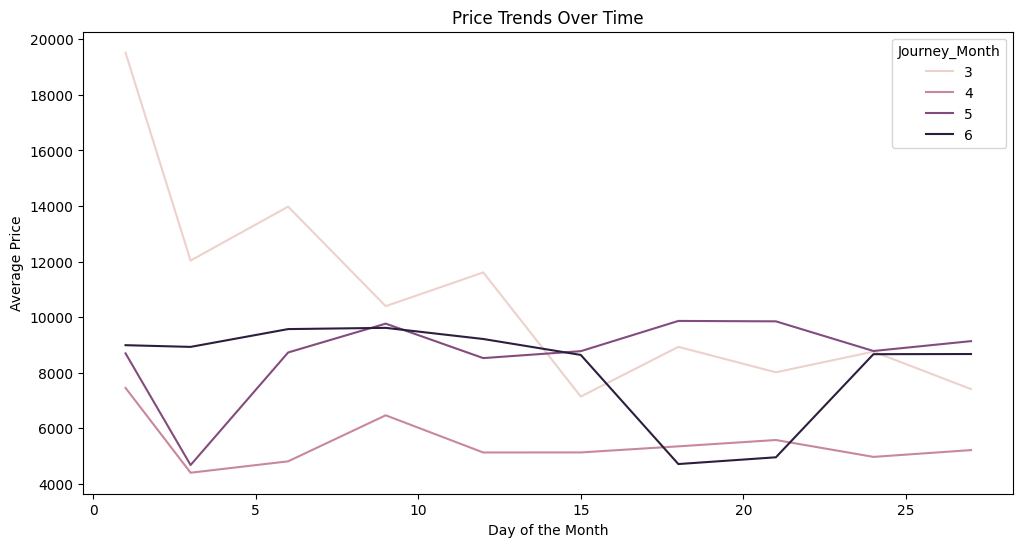

In [ ]:
price_trends = df.groupby(['Journey_Month', 'Journey_Day'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='Journey_Day', y='Price', hue='Journey_Month')
plt.title('Price Trends Over Time')
plt.xlabel('Day of the Month')
plt.ylabel('Average Price')
plt.show()

**Handling Categorical Data**

In [ ]:
# Encoding categorical features
label_encoders = {}

for column in ['Airline', 'Source', 'Destination', 'Total_Stops','Additional_Info']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Save all LabelEncoders into a single file
for column, le in label_encoders.items():
    with open(f'label_encoder_{column}.pkl', 'wb') as le_file:
        pickle.dump(le, le_file)

In [ ]:
# Route and Total Stops are related to each other
df.drop(['Route'],axis=1,inplace =True)

In [ ]:
df


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,3,0,4,4,8,3897,24,3,22,20,1,10,2.0,50.0
1,1,2,0,1,8,7662,1,5,5,50,13,15,7.0,25.0
2,4,4,1,1,8,13882,9,6,9,25,4,25,19.0,0.0
3,3,2,0,0,8,6218,12,5,18,5,23,30,5.0,25.0
4,3,0,4,0,8,13302,1,3,16,50,21,35,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,0,4,8,4107,9,4,19,55,22,25,2.0,30.0
10679,1,2,0,4,8,4145,27,4,20,45,23,20,2.0,35.0
10680,4,0,4,4,8,7229,27,4,8,20,11,20,3.0,0.0
10681,10,0,4,4,8,12648,1,3,11,30,14,10,2.0,40.0


In [ ]:
df.shape


(10682, 14)

In [ ]:
df.insert(13, 'Price', df.pop('Price'))
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Price
0,3,0,4,4,8,24,3,22,20,1,10,2.0,50.0,3897
1,1,2,0,1,8,1,5,5,50,13,15,7.0,25.0,7662
2,4,4,1,1,8,9,6,9,25,4,25,19.0,0.0,13882
3,3,2,0,0,8,12,5,18,5,23,30,5.0,25.0,6218
4,3,0,4,0,8,1,3,16,50,21,35,4.0,45.0,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,0,4,8,9,4,19,55,22,25,2.0,30.0,4107
10679,1,2,0,4,8,27,4,20,45,23,20,2.0,35.0,4145
10680,4,0,4,4,8,27,4,8,20,11,20,3.0,0.0,7229
10681,10,0,4,4,8,1,3,11,30,14,10,2.0,40.0,12648


**Feature Selection**

In [ ]:
#Split the dataset into features (X) and the target variable (y)
X = df.iloc[:,:-1]
X


,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Journey_Month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,3,0,4,4,8,24,3,22,20,1,10,2.0,50.0
1,1,2,0,1,8,1,5,5,50,13,15,7.0,25.0
2,4,4,1,1,8,9,6,9,25,4,25,19.0,0.0
3,3,2,0,0,8,12,5,18,5,23,30,5.0,25.0
4,3,0,4,0,8,1,3,16,50,21,35,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,0,4,8,9,4,19,55,22,25,2.0,30.0
10679,1,2,0,4,8,27,4,20,45,23,20,2.0,35.0
10680,4,0,4,4,8,27,4,8,20,11,20,3.0,0.0
10681,10,0,4,4,8,1,3,11,30,14,10,2.0,40.0


In [ ]:
y = df['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [ ]:
# Create and fit a StandardScaler to the training data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.41080484, -1.59158198,  1.73866073, ..., -0.8900139 ,
        -0.97061397,  1.27904078],
       [-1.26115217, -0.301554  , -1.02642267, ..., -0.5870944 ,
        -0.38199906, -0.19631866],
       [ 0.01436882,  0.98847397, -0.33515182, ...,  0.0187446 ,
         1.03067671, -1.67167809],
       ...,
       [ 0.01436882, -1.59158198,  1.73866073, ..., -0.2841749 ,
        -0.85289099, -1.67167809],
       [ 2.56541078, -1.59158198,  1.73866073, ..., -0.8900139 ,
        -0.97061397,  0.688897  ],
       [-1.26115217,  0.98847397, -0.33515182, ..., -0.5870944 ,
        -0.26427608, -0.49139054]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)


**5.Model Building and Evaluation**

In [ ]:
# Define the regression models
models = [
    ("KNeighbors Regression", KNeighborsRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor()),
    ("Decision Tree", DecisionTreeRegressor())
]

results = []

In [ ]:
# Train and evaluate the models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, r2])

In [ ]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared'])
print(results_df)


                   Model  Mean Squared Error  Mean Absolute Error  R-squared
0  KNeighbors Regression        4.668373e+06          1235.538908   0.763949
1      Linear Regression        1.110922e+07          2470.278039   0.438276
2          Random Forest        2.588492e+06           690.386271   0.869116
3          Decision Tree        4.815049e+06           771.490796   0.756533


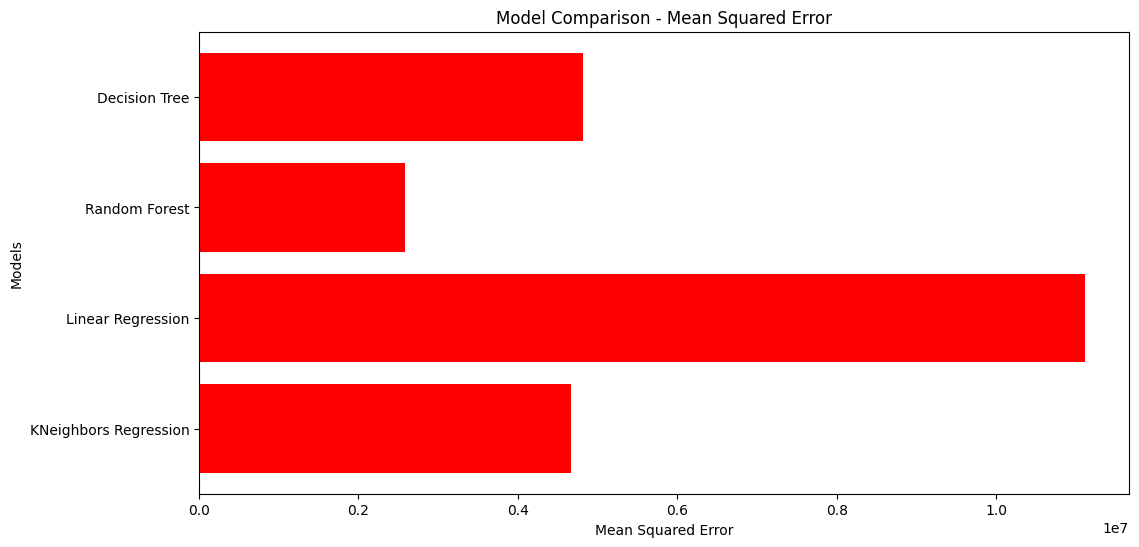

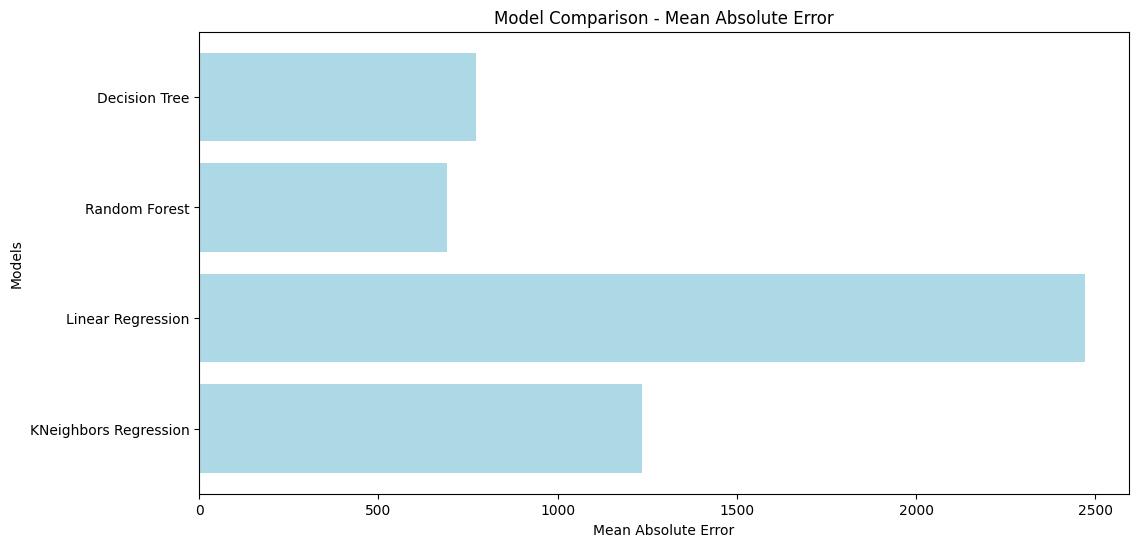

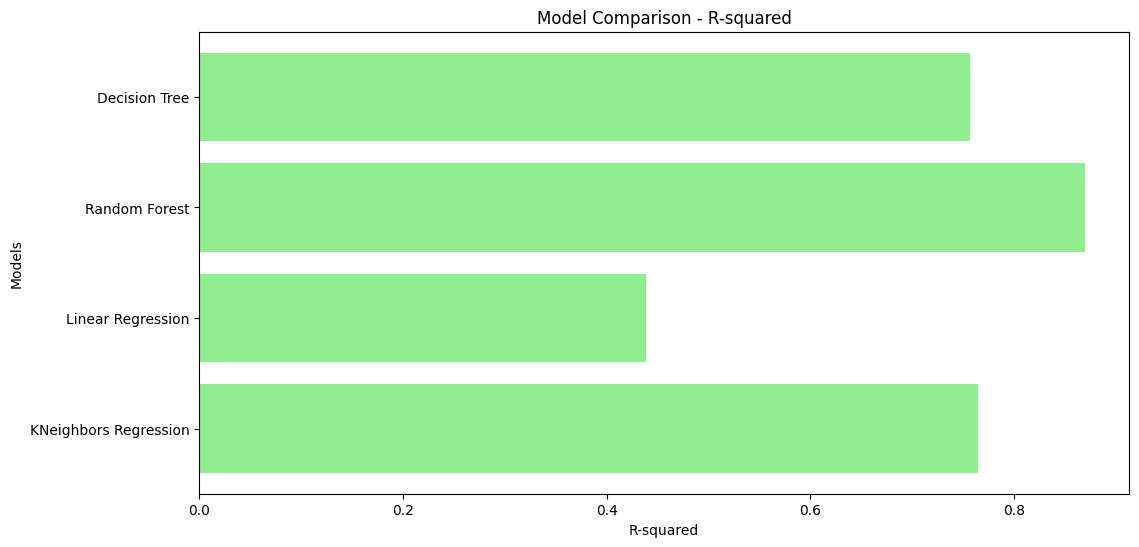

In [ ]:
model_names = [model[0] for model in models]

# Define the metrics and their corresponding colors
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']
metric_colors = ['red', 'lightblue', 'lightgreen']

# Plot model comparison for each metric
for metric, color in zip(metrics, metric_colors):
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, results_df[metric], color=color)
    plt.xlabel(metric)
    plt.ylabel('Models')
    plt.title(f'Model Comparison - {metric}')

**Hyper Parameter Tuning**

In [ ]:
# Hyperparameter Tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 15, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 25],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
# Best Parameters
best_rf_model = grid_search.best_estimator_

In [ ]:
# Predicting with the best model
y_pred_new = best_rf_model.predict(X_test)
print("R-squared after Hyperparameter Tuning:", r2_score(y_test, y_pred_new))

R-squared after Hyperparameter Tuning: 0.8884030808226263


**After Hyper Parameter Tuning ,Accuracy increases**


In [ ]:
y_new=grid_search.predict([[1,	2	,0	,1	,1, 1	,5	,5	,50,	13,	15,	7.0,	25.0]])
y_new

array([11969.59])

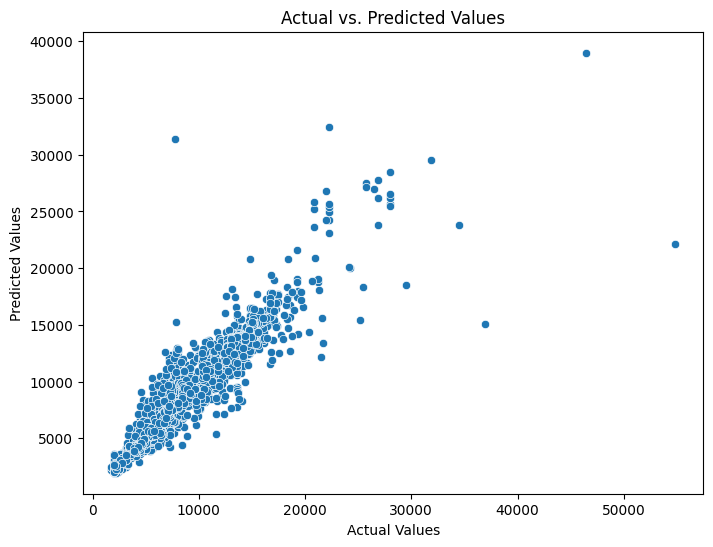

In [ ]:
# Scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_new)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# **Conclusion**
**In summary, the dataset captures crucial details encompassing airlines, journey dates, routes, timing, and additional factors that influence flight ticket prices. Its comprehensive information provides a valuable resource for training machine learning models aimed at accurately predicting and understanding the dynamics of airfare pricing. By leveraging this dataset, the aviation industry can benefit from informed pricing strategies, while travelers can make more informed decisions when purchasing flights**

In [ ]:
import joblib

In [ ]:
# Save the tuned model
joblib.dump(grid_search, 'tuned_random_forest_model.pkl')

['tuned_random_forest_model.pkl']